In [3]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np

In [8]:
data = pd.read_csv("UsedCarsDataset.csv")
print(data)

      Unnamed: 0                                           car_name  \
0              0                    2017 Mercedes-Benz S-Class S400   
1              1  2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI   
2              2                       2018 BMW X1 sDrive 20d xLine   
3              3                           2019 Kia Seltos GTX Plus   
4              4                    2019 Skoda Superb LK 1.8 TSI AT   
...          ...                                                ...   
1548        1548           2020 Hyundai Creta SX Opt Diesel AT BSVI   
1549        1549                 2022 Renault KWID 1.0 RXL Opt BSVI   
1550        1550                           2017 Honda WR-V i-VTEC S   
1551        1551           2018 Volkswagen Polo 1.0 MPI Comfortline   
1552        1552                        2018 Maruti Swift Dzire VXI   

     registration_year     insurance_validity fuel_type  seats  kms_driven  \
0               Jul-17          Comprehensive    Petrol      5       

[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000]


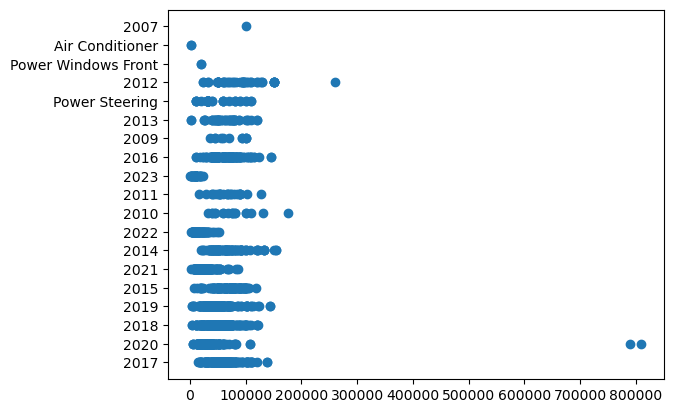

In [9]:
l = []
for i in range(0,86000,5000):
    l.append(i)
print(l)
pl.scatter(data.kms_driven,data.manufacturing_year)

    studytime      marks
0   14.638887   0.066557
1   84.548801  86.968678
2   95.723199  11.571671
3   33.162167  56.976751
4   95.257354  97.411099
..        ...        ...
95   7.446221  97.271231
96  80.242406  40.900665
97  95.146649   5.691596
98  76.432472  37.133441
99  40.707946  94.548731

[100 rows x 2 columns]


Text(0, 0.5, 'marks')

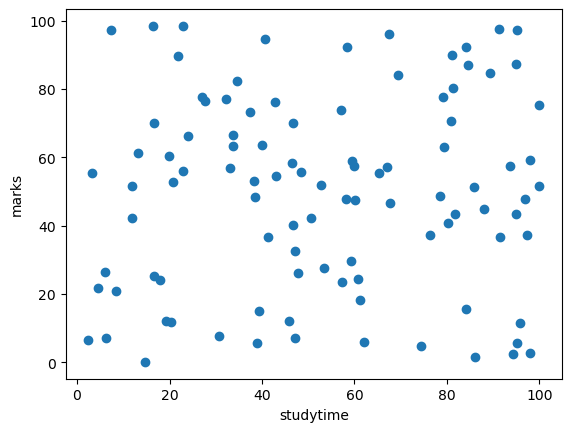

In [10]:
rawdata = []
a = np.random.rand(100)
index = []
studytime = a*100
b = np.random.rand(100)
marks = b*100
for i in range(0,100):
    index.append(i)
    dummy = [studytime[i],marks[i]]
    rawdata.append(dummy)
data = pd.DataFrame(rawdata,columns = ['studytime','marks'])
print(data)
pl.scatter(data.studytime,data.marks)
pl.xlabel('studytime')
pl.ylabel('marks')

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
0.7021911579752431 2.0919909998618915


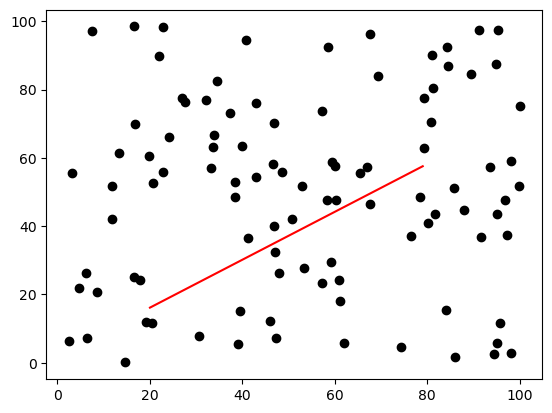

In [11]:
def loss_function(m,b,points):
    totalerror = 0
    for i in range(len(points)):
        x = points.iloc[i].studytime
        y = points.iloc[i].marks
        totalerror = totalerror + (y - (m*x - b))**2
    totalerror/float(len(points))
def gradient_descent(m_now,b_now,points,L):
    m_gradient = 0
    b_gradient = 0
    n = len(points)
    
    for i in range(n):
        x = points.iloc[i].studytime
        y = points.iloc[i].marks
        m_gradient = m_gradient + (-(2/n)*x*(y - (m_now * x + b_now)))
        b_gradient = b_gradient + (-(2/n)*(y - (m_now * x + b_now)))
    m = m_now - m_gradient*L
    b = b_now - b_gradient*L
    return m,b
m = 0
b = 0
L = 0.0001
#epoochs is for number of iterations
epoochs = 1000

for i in range(epoochs):
    if(i%50 == 0):
        print(i)
    m,b = gradient_descent(m,b,data,L)
    
print(m,b)
pl.scatter(data.studytime,data.marks,color = 'black')
pl.plot((list(range(20,80))),[m * x + b for x in range(20,80)],color = 'red')

In [33]:
#for the USEDCARS Dataset
Cdata.columns

Index(['Unnamed: 0', 'car_name', 'registration_year', 'insurance_validity',
       'fuel_type', 'seats', 'kms_driven', 'ownsership', 'transmission',
       'manufacturing_year', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)', 'price(in lakhs)'],
      dtype='object')

In [52]:
# # Preprocess the data
# data = data.astype({'registration_year': 'float64',
#                     'insurance_validity': 'float64',
#                     'seats': 'float64',
#                     'kms_driven': 'float64',
#                     'manufacturing_year': 'float64',
#                     'mileage(kmpl)': 'float64',
#                     'engine(cc)': 'float64
#                     'max_power(bhp)': 'float64',
#                     'torque(Nm)': 'float64'})
# data['price(in lakhs)'] = data['price(in lakhs)'].astype('float64')
# data['ownsership'].fillna('Second Owner', inplace=True) 
# data['transmission'].fillna('Manual', inplace=True)

# X = data.drop('price(in lakhs)', axis=1) 
# y = data['price(in lakhs)'] 

# def loss_function(X, y, coefficients):
#     y_pred = np.dot(X, coefficients)
#     mse = np.mean((y_pred - y)**2)
#     return mse

# def gradient_descent(X, y, coefficients, learning_rate, num_iterations):
#     for i in range(num_iterations):
#         y_pred = np.dot(X, coefficients)
#         gradient = np.dot(X.T, (y_pred - y)) / len(y)
#         coefficients -= learning_rate * gradient
#     return coefficients

# coefficients = np.zeros(X.shape[1])

# learning_rate = 0.0001
# num_iterations = 1000

# coefficients = gradient_descent(X, y, coefficients, learning_rate, num_iterations)

# print("Coefficients:")
# for i, c in enumerate(coefficients):
#     print(f"{X.columns[i]}: {c:.2f}")

# new_car = pd.DataFrame([{
#     'registration_year': 2020,
#     'insurance_validity': 12,
#     'fuel_type': 'Petrol',
#     'seats': 5,
#     'kms_driven': 5000,
#     'ownsership': 'First Owner',
#     'transmission': 'Automatic',
#     'manufacturing_year': 2018,
#     'mileage(kmpl)': 15,
#     'engine(cc)': 1200,
#     'max_power(bhp)': 90,
#     'torque(Nm)': 150
# }])
# new_car = (new_car - X.mean()) / X.std()
# new_car = new_car.drop(['ownsership', 'transmission'], axis=1)
# predicted_price = np.dot(new_car, coefficients)
# print(f"Predicted price: {predicted_price:.2f}")

ValueError: could not convert string to float: 'Jul-17'